# All Saxophones, Brass OK: PCA

* model = PCA
* target = ALL SAXES

Determine the optimal value for PCA hyperparamter "n_components", use dataset for classifying whether or not a saxophone is playing in a sample, samples including brass instruments are left in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import AUC, Recall
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, \
     roc_curve, roc_auc_score

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _all_saxes_brass_ok_lmsc import TEST_SIZE, VALIDATION_SIZE, \
    BANDS, TIME_SLICES, master, lmss, data, target

Reading lms_data_0.pkl...
(857, 9230)
Reading lms_data_1.pkl...
(867, 9230)
Appending 1...
Reading lms_data_2.pkl...
(873, 9230)
Appending 2...
Reading lms_data_3.pkl...
(882, 9230)
Appending 3...
Reading lms_data_4.pkl...
(874, 9230)
Appending 4...
Reading lms_data_5.pkl...
(859, 9230)
Appending 5...
Reading lms_data_6.pkl...
(877, 9230)
Appending 6...
Reading lms_data_7.pkl...
(867, 9230)
Appending 7...
Reading lms_data_8.pkl...
(871, 9230)
Appending 8...
Making labels...
(7827, 9231)
Selecting columns...
(7827, 9216)
Trying to make numpy...
Applying scaler...
Done


In [2]:
xs = [n for n in range(4, 40, 1)]
ys = []
for x in xs:
    pca = PCA(n_components=x)
    pca.fit(data)
    d = pca.transform(data)
    x_train, x_test, y_train, y_test = \
     train_test_split(d, target,
                      test_size=TEST_SIZE,
                      random_state=RANDOM_SEED)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ys.append(clf.score(x_test, y_test))

In [3]:
print(ys.index(max(ys)) + 4)    # 4 is start of range, finding index of max score = best n_components

24


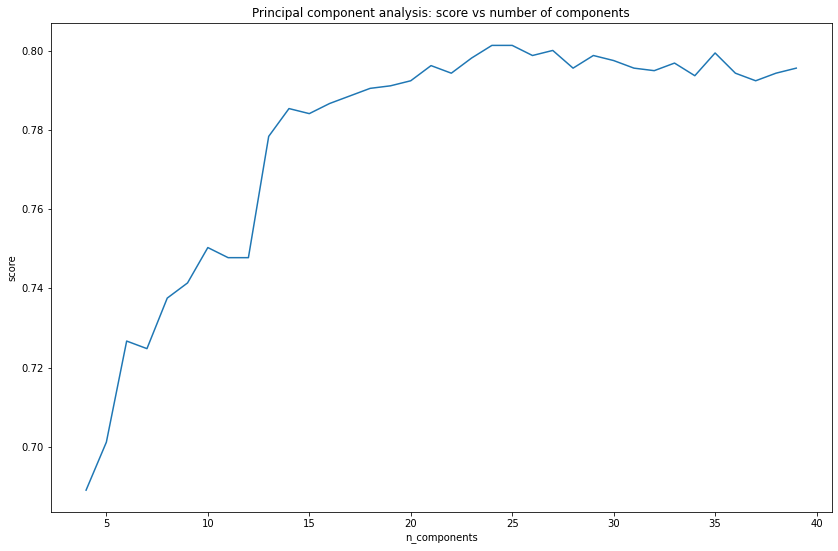

In [4]:
fig = plt.figure(figsize=(14, 9))    
plt.plot(xs, ys)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title("Principal component analysis: score vs number of components")
pass


In [5]:
pca = PCA()
pca.fit(data)

PCA()

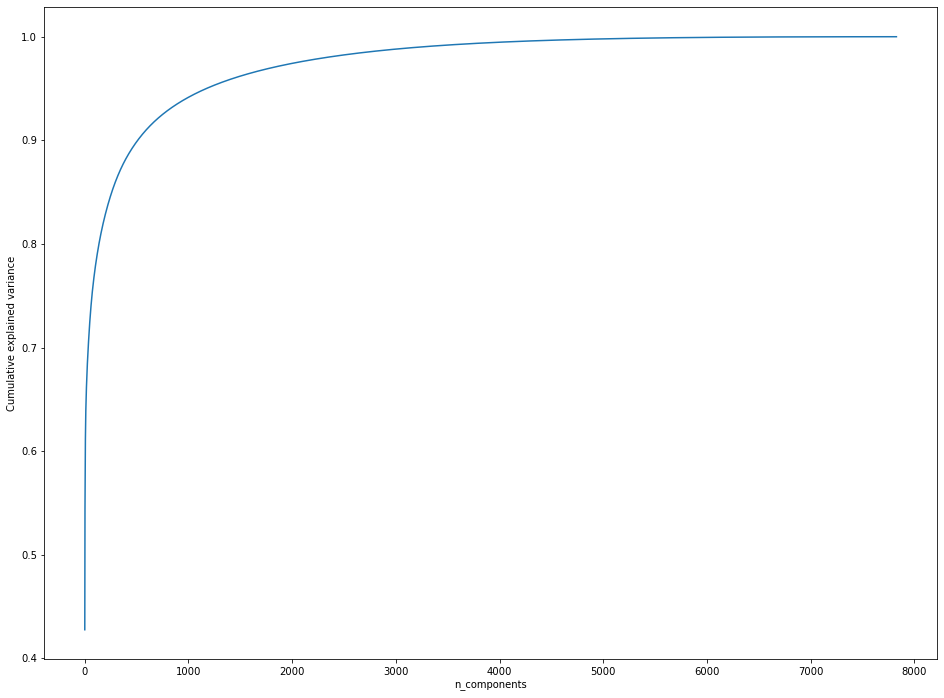

In [6]:
fig = plt.figure(figsize=(16, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance');